In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_df(code: str) -> pd.DataFrame:
    df = pd.read_csv(f'../data/{code}.XSHE_2023-03-28_2024-04-03.csv')
    return df

In [9]:
df = get_stock_df("000001")

In [6]:
print(df.info)

print("--------------------")

print(df.describe())

<bound method DataFrame.info of            date   open  close   high    low       volume         money  \
0    2023-03-28  11.53  11.52  11.60  11.43   73959636.0  8.517979e+08   
1    2023-03-29  11.60  11.42  11.61  11.39   65420339.0  7.506876e+08   
2    2023-03-30  11.43  11.55  11.58  11.31   90497102.0  1.035423e+09   
3    2023-03-31  11.56  11.42  11.64  11.40   94991018.0  1.092263e+09   
4    2023-04-03  11.43  11.54  11.56  11.35   81264898.0  9.342852e+08   
..          ...    ...    ...    ...    ...          ...           ...   
243  2024-03-28   9.81   9.79   9.87   9.69  139520241.0  1.362980e+09   
244  2024-03-29   9.75   9.82   9.87   9.73   93509891.0  9.173323e+08   
245  2024-04-01   9.82   9.93   9.94   9.81  127616567.0  1.261770e+09   
246  2024-04-02   9.92   9.85   9.97   9.83  116299099.0  1.149701e+09   
247  2024-04-03   9.83   9.76   9.85   9.73  105197770.0  1.028649e+09   

       factor  
0    0.911130  
1    0.911130  
2    0.911130  
3    0.911130  

In [14]:
# 最低收盘价
def testCloseMin():
    print(f"close min: {df['close'].min()}")

    print(f"close min index: {df['close'].idxmin()}")

    print(f"close min frame:\n{df.loc[df['close'].idxmin()]}")
testCloseMin()

close min: 8.43
close min index: 179
close min frame:
date        2023-12-20
open               8.5
close             8.43
high              8.54
low               8.43
volume      76675032.0
money     650511342.87
factor        0.933333
Name: 179, dtype: object


In [19]:
# 每月平均收盘价与开盘价
def testMean():
    df["date"] = df["date"]
    df["month"] = pd.to_datetime(df["date"]).dt.month

    print(f"month close mean:\n{df.groupby('month')['close'].mean()}")
    print(f"month open mean:\n{df.groupby('month')['open'].mean()}")

testMean()

month close mean:
month
1      8.659091
2      9.414667
3     10.023200
4     11.232273
5     11.356500
6     10.698500
7     10.698571
8     10.914783
9     10.514500
10    10.025882
11     9.567727
12     8.675238
Name: close, dtype: float64
month open mean:
month
1      8.640909
2      9.307333
3     10.033600
4     11.228636
5     11.400000
6     10.702500
7     10.652381
8     10.965652
9     10.509500
10    10.058235
11     9.602273
12     8.676190
Name: open, dtype: float64


In [22]:
# 计算涨跌幅
# 涨跌幅今日收盘价减去昨日收盘价
def testRipples_ratio():
    df['date'] = pd.to_datetime(df['date'])
    df['rise'] = df['close'].diff()
    df['rise_ratio'] = df['rise'] / df.shift(-1)['close']
    print(df)

testRipples_ratio()

          date   open  close   high    low       volume         money  \
0   2023-03-28  11.53  11.52  11.60  11.43   73959636.0  8.517979e+08   
1   2023-03-29  11.60  11.42  11.61  11.39   65420339.0  7.506876e+08   
2   2023-03-30  11.43  11.55  11.58  11.31   90497102.0  1.035423e+09   
3   2023-03-31  11.56  11.42  11.64  11.40   94991018.0  1.092263e+09   
4   2023-04-03  11.43  11.54  11.56  11.35   81264898.0  9.342852e+08   
..         ...    ...    ...    ...    ...          ...           ...   
243 2024-03-28   9.81   9.79   9.87   9.69  139520241.0  1.362980e+09   
244 2024-03-29   9.75   9.82   9.87   9.73   93509891.0  9.173323e+08   
245 2024-04-01   9.82   9.93   9.94   9.81  127616567.0  1.261770e+09   
246 2024-04-02   9.92   9.85   9.97   9.83  116299099.0  1.149701e+09   
247 2024-04-03   9.83   9.76   9.85   9.73  105197770.0  1.028649e+09   

       factor  month  rise  rise_ratio  
0    0.911130      3   NaN         NaN  
1    0.911130      3 -0.10   -0.008658  


In [ ]:
# 计算MACD
# MACD计算需要四个指标
# 短期EMA：短期收盘价指数移动均线(12天)     公式：前一日EMA(12)*11/13 + 今日收盘价*2/13
# 长期EMA：长期收盘价指数移动均线(26天)     公式：前一日EMA(26)*25/27 + 今日收盘价*2/27
# DIF：DIF线的M日指数移动均线             公式：前一日DEA*8/10 + 今日DEA*2/10
# MACD: DIF线与DEA线的差*2              公式：(DIF - DEA) * 2
# Pandas中指数加权移动窗口函数，采用ewm函数+mean() 快捷计算MACD

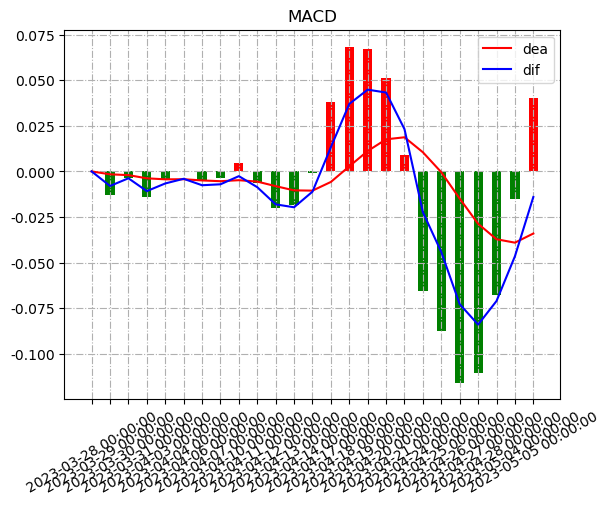

In [ ]:
class MACD():
    def cal_macd(self, df, fastperiod=12, slowperiod=26, signalperiod=9):
        ewma_fast = df['close'].ewm(span=fastperiod, adjust=False).mean()
        ewma_slow = df['close'].ewm(span=slowperiod, adjust=False).mean()

        df['dif'] = ewma_fast - ewma_slow
        df['dea'] = df['dif'].ewm(span=signalperiod, adjust=False).mean()
        df['bar'] = (df['dif'] - df['dea']) * 2
        return df
    
    def show(self):
        df['date'] = pd.to_datetime(df['date'])

        df_macd = self.cal_macd(df)[0:25]

        plt.figure()
        df_macd['dea'].plot(color="red", label="dea")
        df_macd['dif'].plot(color="blue", label="dif")
        plt.legend(loc='best')

        pos_bar = []
        pos_index = []
        neg_bar = []
        neg_index = []

        for index, row in df_macd.iterrows():
            if(row['bar'] > 0):
                pos_bar.append(row['bar'])
                pos_index.append(index)
            else:
                neg_bar.append(row['bar'])
                neg_index.append(index)
        
        # 大于0用红色表示
        plt.bar(pos_index, pos_bar, width=0.5, color='red')
        # 小于0则用绿色表示
        plt.bar(neg_index, neg_bar, width=0.5, color='green')

        major_index = df_macd.index[df_macd.index]
        major_xtics = df_macd['date'][df_macd.index]

        plt.xticks(major_index, major_xtics)
        plt.setp(plt.gca().get_xticklabels(), rotation=30)

        plt.grid(linestyle="-.")
        plt.title('MACD')
        plt.rcParams['axes.unicode_minus'] = False
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.show()

macd = MACD()
macd.show()

/tmp/ipykernel_13228/2023881277.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['k'] = pd.DataFrame(rsv).ewm(com=2).mean()
/tmp/ipykernel_13228/2023881277.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d'] = df['k'].ewm(com=2).mean()
/tmp/ipykernel_13228/2023881277.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

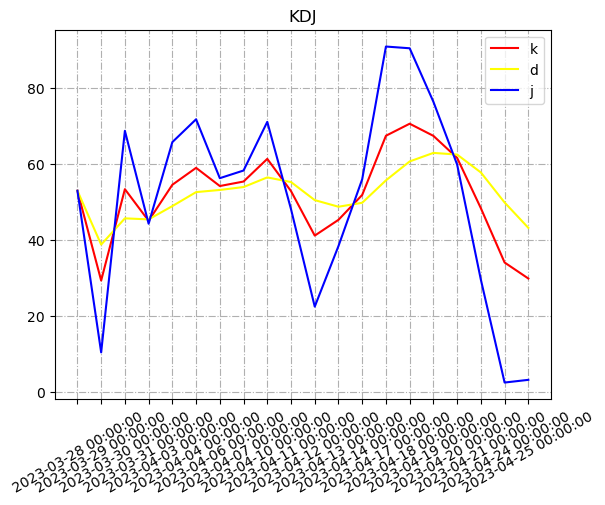

In [28]:
# 计算KDJ
# 计算需要的指标如下：
# RSV：未成熟随机指标值     公式：(Cn - Ln) / (Hn - Ln) * 100(N日)
# K：当天K值        公式：2/3*前一天k值+1/3*当日RSV
# D：当天D值        公式：2/3*前一天D值+1/3*当前K值
# J：当天J值        公式：3*当日K值 - 2*当日D值
# 备注：若无前一日K值与D值，则可分别用50来代替
def cal_kdj(df):
    low_list = df['low'].rolling(9, min_periods=9).min()
    low_list.fillna(value=df['low'].expanding().min(), inplace=True)
    high_list = df['high'].rolling(9, min_periods=9).max()
    high_list.fillna(value=df['high'].expanding().max(), inplace=True)

    rsv = (df['close'] - low_list) / (high_list - low_list) * 100
    df['k'] = pd.DataFrame(rsv).ewm(com=2).mean()
    df['d'] = df['k'].ewm(com=2).mean()
    df['j'] = 3 * df['k'] - 2 * df['d']
    return df

def show_KDJ(df):
    df_kdj = cal_kdj(df)
    plt.figure()

    df_kdj['k'].plot(color="red", label="k")
    df_kdj['d'].plot(color="yellow", label='d')
    df_kdj['j'].plot(color="blue", label='j')
    plt.legend(loc='best')

    major_index = df_kdj.index[df_kdj.index]
    major_xtics = df_kdj['date'][df_kdj.index]

    plt.xticks(major_index, major_xtics)
    plt.setp(plt.gca().get_xticklabels(), rotation=30)

    plt.grid(linestyle='-.')
    plt.title("KDJ")
    plt.rcParams["axes.unicode_minus"] = False
    plt.rcParams["font.sans-serif"] = ["SimHei"]
    plt.show()

kdj_df = cal_kdj(df)
show_KDJ(kdj_df.head(20))